<p style="text-align: center; font-size: 30px;"><b>Decision Trees Basics</b></p>

# Decision Trees

Decision trees are machine learning models that identify patterns within data features to make predictions. For example, a decision tree can be designed to estimate whether a student will achieve an A on their next test.

The model works by asking a sequence of questions about the features of a data point. Questions such as “What is the student’s average grade?” help guide the classification process step by step.

In this case, the classifier uses four features:
- The student’s average grade in the course  
- Planned study time before the test  
- Planned sleep hours the night before  
- Whether the student intends to cheat  

Following the tree involves starting at the top and moving down paths based on the feature values. For instance, a student with a B average, more than 3 study hours, less than 5 hours of sleep, and no cheating plan would reach a leaf node predicting they will not receive an A.

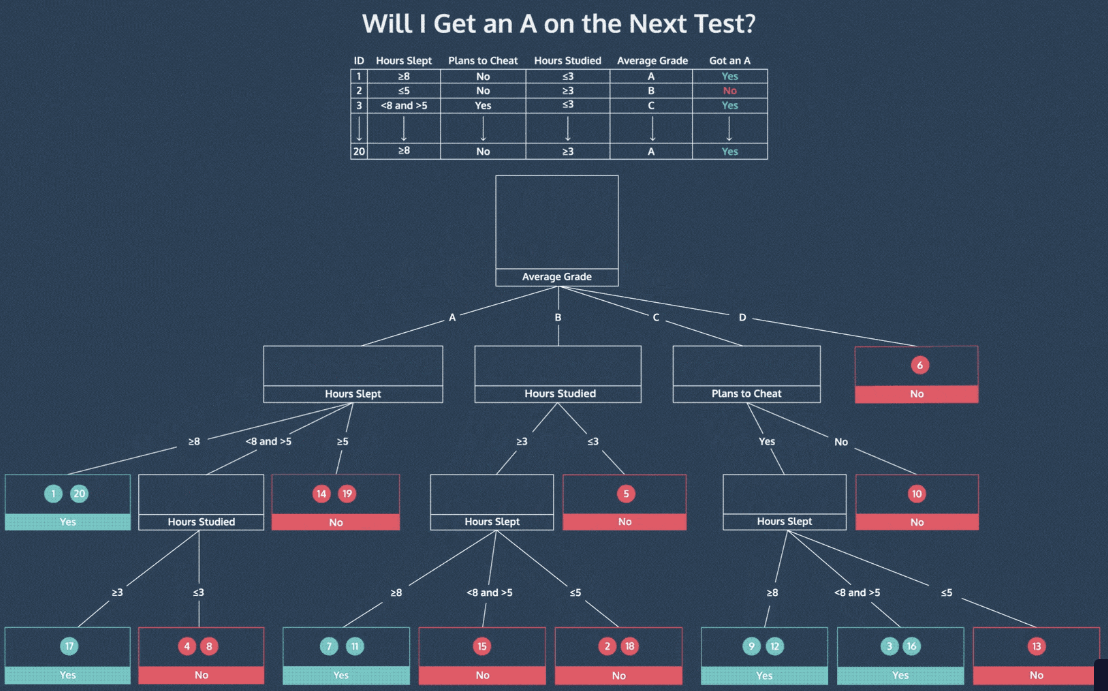

A decision tree is a type of supervised machine learning model built from labeled training data. The learning process involves constructing the tree itself.

The process begins with all training data points placed at the top of the tree. Each point has a label, for example: red = students who did not earn an A, green = students who did. The data is then divided into subsets based on a chosen feature, such as average grade in the class. Students with similar values for that feature are grouped together.

This splitting process is repeated within each subset, using different features at each step. Eventually, the splits stop, and the remaining groups become the leaves of the tree. At a leaf, the classification is decided by the majority label of the points that end up there. New, unlabeled data points are classified according to this rule.

The structure of the tree depends on which features are chosen for splitting. Selecting different features at the start can lead to very different trees and predictions. Determining the best way to split features is a key challenge, which will be addressed later.

# Implementing a Decision Tree

In this lesson we’ll take a reverse approach: first train a decision tree on real data and visualize it with scikit-learn, then break down what the picture means and how the algorithm works. Along the way we’ll cover how to read the tree diagram, how scikit-learn builds trees, the idea of Gini impurity, and which settings (parameters and hyperparameters) control model behavior.

We’ll practice on a car-evaluation dataset with six features:

- buying: purchase price (`vhigh`, `high`, `med`, `low`)
- maint: maintenance cost (`vhigh`, `high`, `med`, `low`)
- doors: number of doors (`2`, `3`, `4`, `5more`)
- persons: seating capacity (`2`, `4`, `more`)
- lugboot: trunk size (`small`, `med`, `big`)
- safety: safety rating (`low`, `med`, `high`)

Goal: use a decision tree to understand which factors matter when deciding whether a car is worth buying.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import models from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [6]:
# -----------------------------------------------
# 1. Explore and prepare the dataset
# -----------------------------------------------

# 1a. Load the dataset
# This takes a csv file without column names and sets the names with th names = [] parameter
df = pd.read_csv(
    'data_folder/cars.csv',
    names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep']
)

# 1b. Inspect the first five rows of the dataset
print(df.head())

# 1c. Create predictor (X) and target (y) variables
# Convert target into binary: 1 = acceptable, 0 = not acceptable
'''
The next line of code modifies the target column `accep` into a binary variable.  
- Using `df['accep'] = ~(df['accep'] == 'unacc')`, all entries labeled `"unacc"` become `False` (0), while all other categories 
(`"acc"`, `"good"`, `"vgood"`) become `True` (1).  
- This makes sense if the goal is to classify cars as **acceptable vs. unacceptable**.  
If instead we used `df['accep'] = (df['accep'] == 'acc')`, only `"acc"` would be marked as `True` and every other category 
as `False`. That would exclude `"good"` and `"vgood"` from being treated as acceptable.  
The chosen expression depends on how "acceptable" is defined, but in this dataset, 
the intended meaning is that any category other than `"unacc"` is acceptable.

'''
df['accep'] = ~(df['accep'] == 'unacc')
X = pd.get_dummies(df.iloc[:, 0:6])  # one-hot encode categorical features
y = df['accep']

# 1d. Examine the new feature set
print(X.columns)         # display feature names
print(len(X.columns))    # count how many features were created

  buying  maint doors persons lug_boot safety  accep
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')
21


In [7]:
# -----------------------------------------------
# 2. Train-test split and model fitting
# -----------------------------------------------

# 2a. Split dataset into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.2
)

# 2b. Fit a decision tree classifier
# (we'll refine hyperparameters later; for now just fit the model)
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)

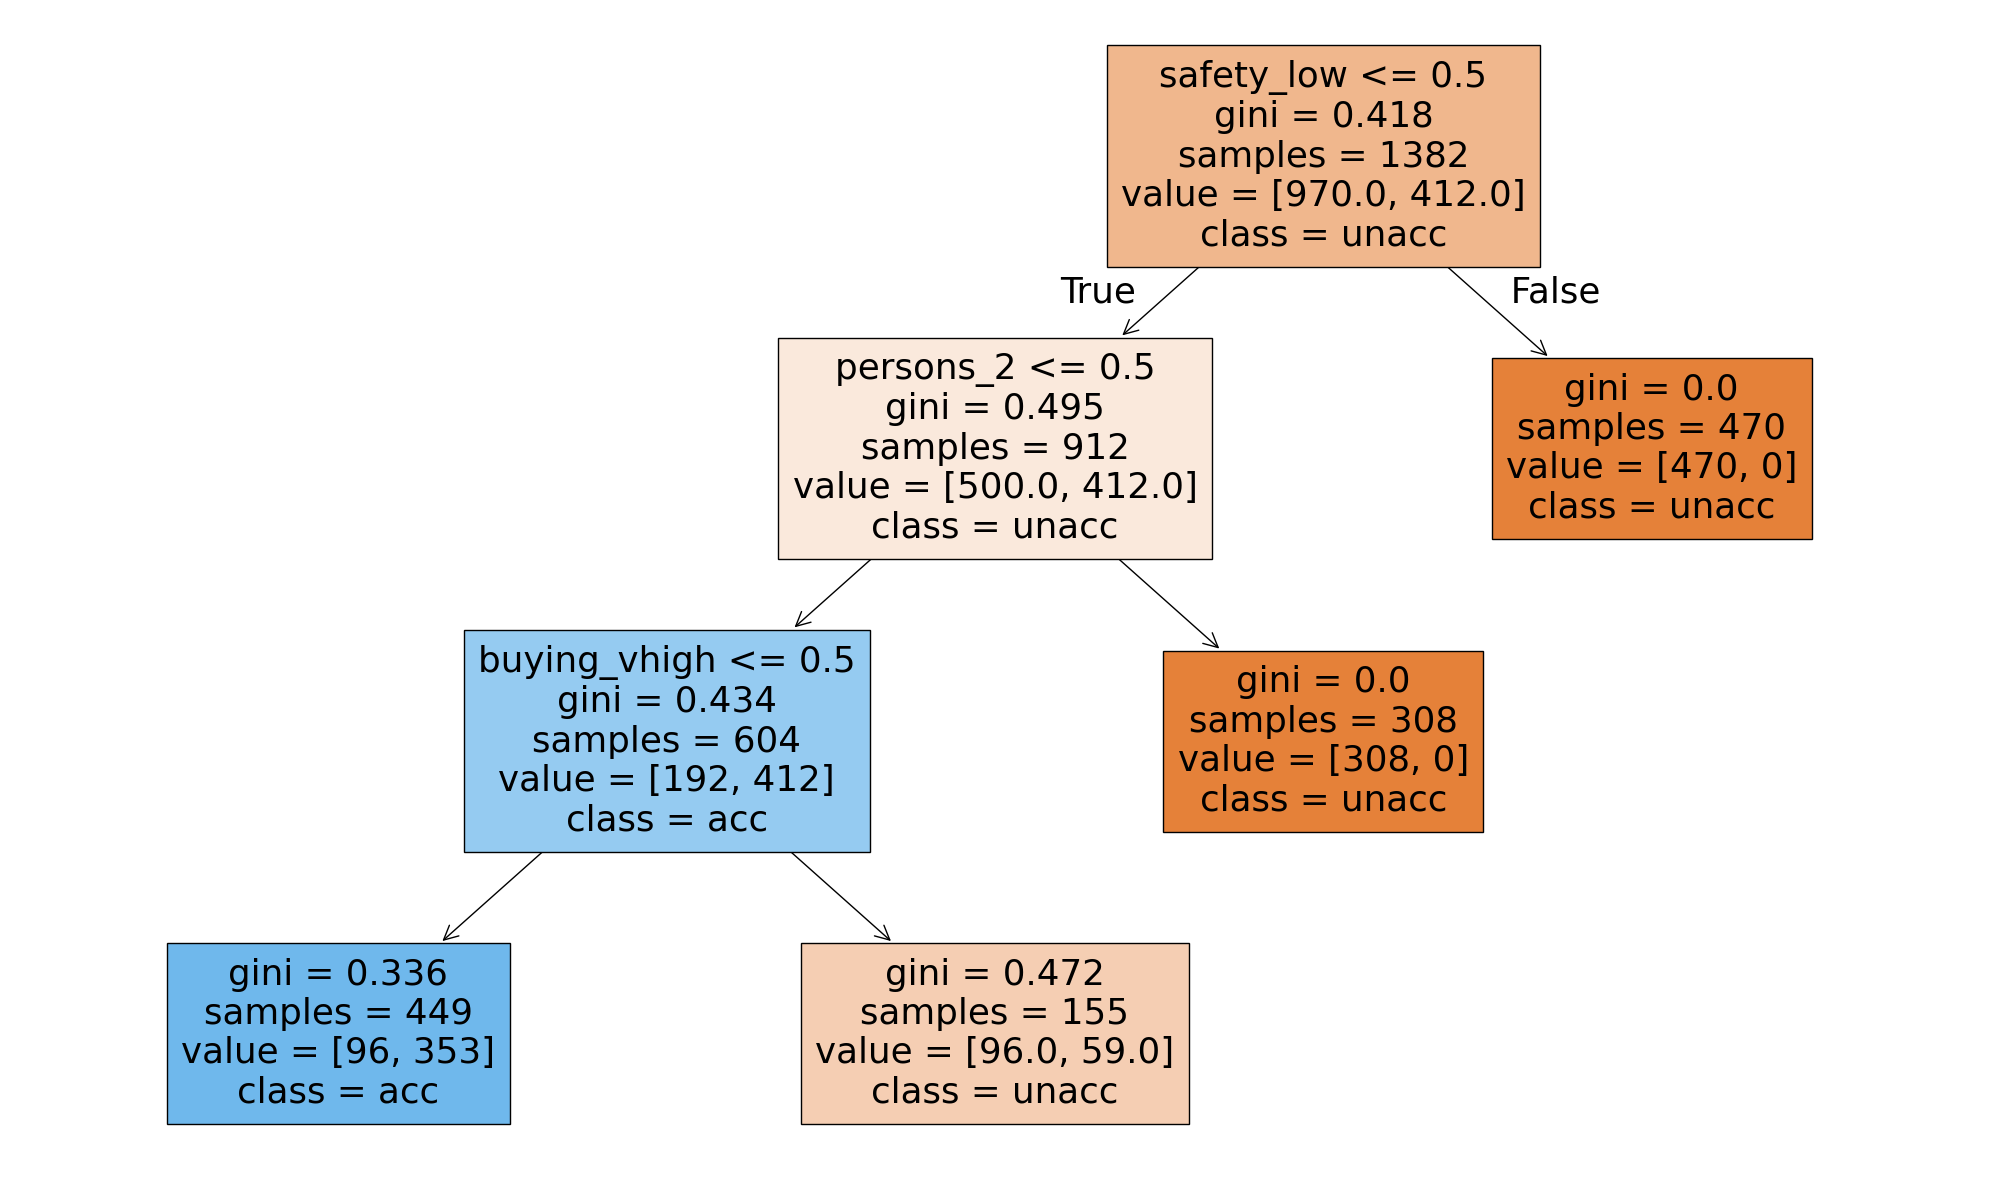

In [8]:
# -----------------------------------------------
# 3. Visualize the decision tree
# -----------------------------------------------

# Use scikit-learn's tree plotting utilities to visualize
plt.figure(figsize=(20, 12))
tree.plot_tree(
    dt,
    feature_names=x_train.columns,
    max_depth=5,
    class_names=['unacc', 'acc'],
    label='all',
    filled=True
)
plt.tight_layout()
plt.show()

# Interpreting a Decision Tree

Looking at the decision tree built from the car dataset, there are a few key points to understand:

- **Root node**: The top of the tree is the root node. It shows the number of training samples and how many belong to each class (acceptable vs. unacceptable). This is the starting point for all splits.

- **Splits**: At each branch, the condition evaluates to either True (left side) or False (right side). If a split leads directly to a leaf node, that path ends there. A leaf node assigns the majority class of the samples it contains — for example, cars labeled as “unacc.”

- **Gini value**: Each box also shows a term called *gini*. This is a measure of how the data is split, and it plays a central role in how the tree decides where to branch. (We’ll cover gini impurity in detail later.)

- **Categorical features**: The tree is built on the following variables:
  - **buying**: price (`vhigh`, `high`, `med`, `low`)
  - **maint**: maintenance cost (`vhigh`, `high`, `med`, `low`)
  - **doors**: number of doors (`2`, `3`, `4`, `5more`)
  - **persons**: seating capacity (`2`, `4`, `more`)
  - **lugboot**: trunk size (`small`, `med`, `big`)
  - **safety**: safety rating (`low`, `med`, `high`)


<p style="font-size: 22px;"><b>
Understanding Splits on One-Hot Encoded Features in Decision Trees</b></p>

When first looking at the root of the tree, the split appears as:

**safety_low <= 0.5**

At first glance, it is tempting to interpret this as a simple yes/no question:  
*“Is the safety of this car low?”*  

Following that reasoning:  
- If **True**, we might expect the safety is low → unacceptable.  
- If **False**, then safety is not low (so medium or high) → acceptable.  

But in the actual tree, the opposite seemed to happen: the **False branch** (safety not low) went directly to *unacceptable*. This felt counterintuitive and raises confusion.

---

## Where the Misinterpretation Comes From

The key detail lies in **how categorical variables are represented after one-hot encoding**.  
The original `safety` column had values `low`, `med`, and `high`. One-hot encoding created binary columns like:

- `safety_low`: 1 if safety = low, else 0  
- `safety_med`: 1 if safety = med, else 0  
- `safety_high`: 1 if safety = high, else 0  

So `safety_low` is not the original question *“Is the safety low?”*, but rather a binary variable taking values 0 or 1. 
Therefore the actual question is **"does the value in the column safety_low have a value <= 0.5?"** As we mentioned, for all rows where the safety **WAS NOT** low, the value of the categorical dummy column was 0, which answer the question with a True.

---

## Why the Split Looks Like `<= 0.5`

Scikit-learn decision trees only generate splits of the form:

**feature <= threshold**

This works naturally for numeric features. For dummy variables (0 or 1), the threshold is always **0.5**:

- If `safety_low <= 0.5` is **True** → then `safety_low == 0` → the car is **not low safety** (so either med or high).  
- If `safety_low <= 0.5` is **False** → then `safety_low == 1` → the car **is low safety**.  

In other words, the tree is not asking “is safety low?” directly — it is comparing a numeric dummy column to a threshold.  

---

## Decision Thresholds for Binary Categorical Features

For binary (dummy) features:  
- **0.5 acts as the cutoff** between the two categories.  
- `<= 0.5` means the feature is 0 (the condition is *not true* for that category).  
- `> 0.5` means the feature is 1 (the condition *is true* for that category).  

So when you see a split like `safety_low <= 0.5`, always read it as:  
- **Left branch (True)** → the car’s safety is not low  
- **Right branch (False)** → the car’s safety is low  

---

## Conclusion

The initial confusion came from trying to interpret the split in plain English, without considering the effect of one-hot encoding. Scikit-learn uses a **universal thresholding approach** (`<= 0.5`) for all features, even binary ones.  

For categorical dummy variables, this simply separates the two cases:  
- `0` → category not present  
- `1` → category present  

Understanding this helps align the tree’s numeric condition with the intuitive interpretation of the original categories.

In [9]:
# -----------------------------------------------
# Interpreting the decision tree – with checkpoints
# -----------------------------------------------

# Checkpoint 1:
# Root node shows samples and class counts: value = [unacc, acc] = [970, 412]
# -> Fraction of acceptable cars used to train the tree:
frac_acc = 412 / (970 + 412)
print(f'Fraction of acceptable cars: {frac_acc}')

# Checkpoint 2:
# First split rule at root: safety_low <= 0.5
# One-hot encoding reminder:
#   safety_low = 1  -> safety == 'low'
#   safety_low = 0  -> safety in {'med', 'high'}
# Scikit-learn sends:
#   True branch (<= 0.5)  -> left  -> safety NOT low
#   False branch (> 0.5)  -> right -> safety IS low
# The right child is a leaf with class = 'unacc', so any car with low safety is predicted 'unacc'.
low_safety_class = "unacc"
print(f'Cars with low safety: {low_safety_class}')

# Checkpoint 3:
# Traverse a sample through the tree:
# Given: buying_vhigh=1, persons_2=0, safety_low=0
#   Step 1 (root): safety_low=0 -> 0 <= 0.5 -> go LEFT
#   Step 2: persons_2 <= 0.5 with persons_2=0 -> go LEFT
#   Step 3: buying_vhigh <= 0.5 with buying_vhigh=1 -> condition is False -> go RIGHT
#   Result leaf: class = 'unacc'
sample_class = "unacc"
print(f'The classs of the sample car: {sample_class}')


Fraction of acceptable cars: 0.2981186685962373
Cars with low safety: unacc
The classs of the sample car: unacc


# Gini Impurity

**Which tree is better?**  
A decision tree is more reliable when its leaves are **pure**—i.e., each leaf contains data from only one class. Mixed leaves (with multiple classes) make predictions less certain.

---

### Gini impurity (binary case)

For two classes with probabilities \(p_1\) and \(p_2 = 1 - p_1\):

\[
G = 1 - (p_1^2 + p_2^2) = 1 - \left(p_1^2 + (1 - p_1)^2\right)
\]

- \(G = 0\) when \(p_1 \in \{0, 1\}\): perfectly pure leaf.  
- \(G\) is maximal at \(p_1 = 0.5\): classes are evenly mixed (most impure).

---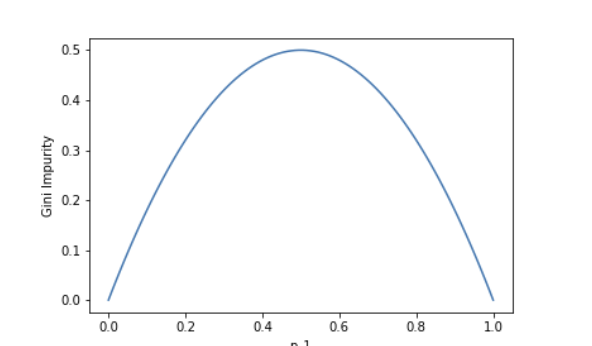

### Gini impurity (multi-class)

For \(C\) classes with probabilities \(p_1, p_2, \dots, p_C\):

\[
G = 1 - \sum_{i=1}^{C} p_i^2
\]

---

### Goal when growing a tree
Choose splits that **reduce Gini impurity** (increase purity), so that child nodes are more homogeneous than their parents.


### Understanding Samples and Values in Decision Trees

At the root node we have:


samples = 1382
value = [970, 412]


- `samples` shows the **total number of observations** in that node (1382).  
- `value` shows the **class distribution**: 970 are `"unacc"` and 412 are `"acc"`.  

---

### How splitting works
When the tree splits on `safety_low <= 0.5`, the 1382 observations are divided into two groups:

- **Left child (True branch):**  
  `samples = 912`, `value = [500, 412]`  
  → These are cars with safety not low (med or high).  
  → Among them, 500 are `"unacc"` and 412 are `"acc"`.  

- **Right child (False branch):**  
  `samples = 470`, `value = [470, 0]`  
  → These are cars with safety = low.  
  → All 470 are `"unacc"`, so the node is pure (gini = 0).  

---

### Key insight
- The **`samples` count** is split according to the feature condition (912 + 470 = 1382).  
- The **`value` counts** are split by class within those samples (970 = 500 + 470, 412 = 412 + 0).  

---

✅ In summary:  
The parent node shows the full dataset at that point. A split divides the dataset into subsets (samples), and within each subset the `value` array tracks how many belong to each class. This explains why the numbers in children add up to the numbers in the parent.

In [10]:
# -----------------------------------------------
# Calculating Gini Impurity for decision tree nodes
# -----------------------------------------------

# Checkpoint 1:
# Root node: samples = 1382, value = [970 unacc, 412 acc]
# Formula: G = 1 - Σ p_i^2
# where p_unacc = 970/1382 and p_acc = 412/1382
gini_root = 1 - ((970/1382)**2 + (412/1382)**2)
print(f'Gini impurity root node : {gini_root}')

# Checkpoint 2:
# Bottom left node: samples = 449, value = [353 unacc, 96 acc]
# Formula applied to that node only:
gini_bottom_left = 1 - ((96/449)**2 + (353/449)**2)
print(f'Gini impurity bottom left node : {gini_bottom_left}')

Gini impurity root node : 0.41848785606128835
Gini impurity bottom left node : 0.33618880858725886


# Information Gain

To build a useful decision tree, we want splits that reduce impurity the most. This reduction is measured by **information gain**, which compares the impurity before and after a split.

---

### Example: Root Node Split

- **Initial impurity (root):**  
  Gini = 0.418 (calculated earlier).

- **First split feature:** `safety_low <= 0.5`  
  - Left child (912 samples, higher safety cars): Gini = 0.495  
  - Right child (470 samples, low safety cars): Gini = 0.0 (pure leaf)

---

### Weighted Gini After Split

We take a weighted average of the children’s Gini impurities:

\[
G_{\text{after}} = \frac{912}{1382} \times 0.495 \;+\; \frac{470}{1382} \times 0
\]

\[
G_{\text{after}} = 0.3267
\]

---

### Information Gain

\[
\text{Information Gain} = G_{\text{before}} - G_{\text{after}}
\]

\[
= 0.4185 - 0.3267 = 0.0918
\]

---

### Interpretation
- A positive information gain means the split improves purity.  
- The **higher the information gain**, the better the feature is at separating the classes.  
- If the information gain is 0, then splitting on that feature provides no benefit.


In [11]:
# -----------------------------------------------
# Information Gain calculations
# -----------------------------------------------

# 1. Information gain at a pure node
# A pure node has gini = 0, so any further split cannot reduce impurity.
# Hence, the weighted gini after the split remains 0 and the info gain = 0.
r = 0.5  # ratio doesn't matter here, since both child impurities are 0
gini_pure_node = 0
gini_info_gain = r * gini_pure_node + (1 - r) * gini_pure_node
print(f'Gini information gain pure node split safety_low >= .5 : {gini_info_gain}')

# 2. Information gain at the 'persons_2' split
# Parent node (912 samples) has initial gini = 0.495
# Left child: 604 samples with gini = 0.434
# Right child: 308 samples with gini = 0
r_persons_2 = 604 / 912
gini_left_split = 0.434
gini_right_split = 0
initial_gini_persons_2 = 0.495

# Weighted gini after the split
weighted_gini_persons_2 = r_persons_2 * gini_left_split + (1 - r_persons_2) * gini_right_split

# Information gain = parent impurity - weighted impurity after split
gini_info_gain_persons_2 = initial_gini_persons_2 - weighted_gini_persons_2
print(f'Gini information gain node persons_2 : {gini_info_gain_persons_2}')


Gini information gain pure node split safety_low >= .5 : 0.0
Gini information gain node persons_2 : 0.20757017543859652


# How a Decision Tree Chooses a Split

**Recap**
- The current tree splits first on `safety_low` (a one-hot dummy: `1` = low safety, `0` = not low).
  - `safety_low = 1` → right branch (low safety)
  - `safety_low = 0` → left branch (medium/high safety)
- **Information gain** = impurity before the split − weighted impurity after the split.
  - For the root split on `safety_low`, we found: \(0.4185 - 0.3267 = 0.0918\).

**Key question:** How do we know this was the best first split?

**What the algorithm does (scikit-learn)**
- At each node, it evaluates *every candidate feature*.
- For each candidate, it computes the **information gain**.
- It picks the feature with the **highest** information gain for that node.
- This process repeats recursively down the tree.

**Testing another root feature: `persons_2`**
- `persons_2` is also binary (0/1). If used as the root:
  - Left branch: `persons_2 < 0.5` (i.e., `persons_2 = 0`)
  - Right branch: `persons_2 > 0.5` (i.e., `persons_2 = 1`)
- Use the provided helper functions:
  - `gini(labels)` to compute node impurity
  - `info_gain(parent_labels, left_labels, right_labels)` to compute information gain
- Compute the information gain for splitting on `persons_2`, then compare it to the value from `safety_low`. The feature with the larger information gain is the better root choice for this dataset.


In [12]:
## The usual libraries, loading the dataset and performing the train-test split
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset and preprocess
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
    names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep']
)
df['accep'] = ~(df['accep']=='unacc')  # 1 = acceptable, 0 = not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

## Functions to calculate gini impurity and information gain
def gini(data):
    """Calculate the Gini Impurity of a dataset."""
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)

def info_gain(left, right, current_impurity):
    """Information Gain of a split."""
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

# -----------------------------------------------------
# 1. Calculate sample sizes for a split on `persons_2`
left = y_train[x_train["persons_2"] == 0]
right = y_train[x_train["persons_2"] == 1]
len_left = len(left)
len_right = len(right)
print('No. of cars with persons_2 == 0:', len_left)
print('No. of cars with persons_2 == 1:', len_right)

# 2. Gini impurity calculations
gi = gini(y_train)          # overall training data impurity
gini_left = gini(left)      # left node impurity
gini_right = gini(right)    # right node impurity
print('Original gini impurity (without splitting!):', gi)
print('Left split gini impurity:', gini_left)
print('Right split gini impurity:', gini_right)

# 3. Information gain when using feature `persons_2`
info_gain_persons_2 = info_gain(left, right, gi)
print('Information gain for persons_2:', info_gain_persons_2)

# 4. Which feature split maximizes information gain?
info_gain_list = []
for col in x_train.columns:
    left = y_train[x_train[col] == 0]
    right = y_train[x_train[col] == 1]
    info_gain_list.append([col, info_gain(left, right, gi)])

info_gain_table = pd.DataFrame(info_gain_list, columns=["Feature", "InfoGain"]).sort_values("InfoGain", ascending=False)

print('Greatest impurity gain at:', info_gain_table.iloc[0, :])
print(info_gain_table)


No. of cars with persons_2 == 0: 917
No. of cars with persons_2 == 1: 465
Original gini impurity (without splitting!): 0.41848785606128835
Left split gini impurity: 0.49485722848081015
Right split gini impurity: 0.0
Information gain for persons_2: 0.09013468781461476
Greatest impurity gain at: Feature     safety_low
InfoGain      0.091603
Name: 19, dtype: object
           Feature  InfoGain
19      safety_low  0.091603
12       persons_2  0.090135
18     safety_high  0.045116
14    persons_more  0.025261
13       persons_4  0.020254
7      maint_vhigh  0.013622
3     buying_vhigh  0.011001
20      safety_med  0.008480
17  lug_boot_small  0.006758
1       buying_low  0.006519
5        maint_low  0.005343
6        maint_med  0.004197
15    lug_boot_big  0.003913
2       buying_med  0.003338
8          doors_2  0.002021
0      buying_high  0.001094
4       maint_high  0.000530
10         doors_4  0.000423
16    lug_boot_med  0.000386
11     doors_5more  0.000325
9          doors_3  0.0000

# How a Decision Tree is Built (Recursion)

A decision tree is constructed using a **recursive process**:

1. Begin with the full training dataset.  
2. Find the feature that provides the **highest information gain**.  
3. Split the dataset into subsets based on that feature.  
4. For each subset, **repeat the process**:  
   - Evaluate all remaining features.  
   - Choose the best split (highest information gain).  
   - Partition the subset accordingly.  

This continues recursively until no further improvement is possible.  

**Stopping condition:**  
Recursion stops when no feature produces additional information gain. At this point, the node becomes a **leaf**, and its class label is determined by the majority class of the samples in that subset.
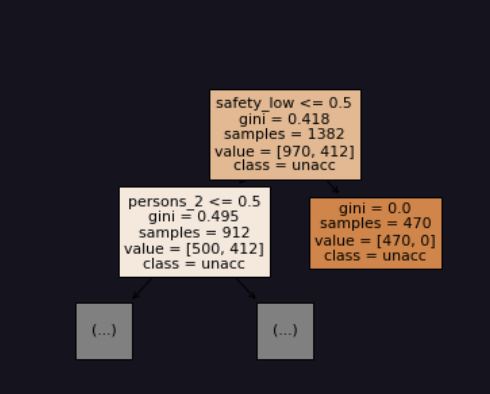

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# ---------------------------------------------------
# Helper functions
# ---------------------------------------------------
def gini(data):
    """Calculate the Gini Impurity of a dataset."""
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)
   
def info_gain(left, right, current_impurity):
    """Information Gain of a split."""
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

# ---------------------------------------------------
# Load and preprocess the dataset
# ---------------------------------------------------
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
    names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep']
)
df['accep'] = ~(df['accep']=='unacc')  # 1 = acceptable, 0 = not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# ---------------------------------------------------
# 1. Focus on left child of the root node (safety_low <= 0.5)
# ---------------------------------------------------
y_train_sub = y_train[x_train['safety_low'] == 0]
x_train_sub = x_train[x_train['safety_low'] == 0]

gi = gini(y_train_sub)
print(f'Gini impurity at left child of root (safety_low <= 0.5): {gi}')

# ---------------------------------------------------
# 2. Check which feature maximizes information gain
# ---------------------------------------------------
info_gain_list = []
for col in x_train.columns:
    left = y_train_sub[x_train_sub[col] == 0]
    right = y_train_sub[x_train_sub[col] == 1]
    info_gain_list.append([col, info_gain(left, right, gi)])

info_gain_table = pd.DataFrame(info_gain_list, columns=["Feature", "InfoGain"]).sort_values("InfoGain", ascending=False)

print('Greatest impurity gain at:', info_gain_table.iloc[0, :])
print(info_gain_table)


Gini impurity at left child of root (safety_low <= 0.5): 0.49534472145275465
Greatest impurity gain at: Feature     persons_2
InfoGain     0.208137
Name: 12, dtype: object
           Feature  InfoGain
12       persons_2  0.208137
14    persons_more  0.056305
13       persons_4  0.048902
7      maint_vhigh  0.027772
3     buying_vhigh  0.025267
17  lug_boot_small  0.015210
1       buying_low  0.014392
5        maint_low  0.009816
15    lug_boot_big  0.009160
6        maint_med  0.008975
2       buying_med  0.008964
20      safety_med  0.006929
18     safety_high  0.006929
8          doors_2  0.004097
0      buying_high  0.002943
4       maint_high  0.001084
16    lug_boot_med  0.000759
11     doors_5more  0.000656
10         doors_4  0.000386
9          doors_3  0.000327
19      safety_low  0.000000


# Decision Trees: Training and Prediction with scikit-learn

The process of building and using a decision tree with scikit-learn is very similar to other models in the library. It can be summarized in four main steps:

1. **Instantiate the model**  
   Create a decision tree classifier and set hyperparameters such as maximum depth if needed.

2. **Train the model**  
   Fit the model to the training data to learn patterns from the dataset.

3. **Make predictions**  
   Use the trained model to classify new data points or estimate class probabilities.

4. **Evaluate performance**  
   Measure accuracy or other performance metrics on test data to assess how well the model generalizes.

---

### Notes
- Input data must be numeric; categorical variables need to be converted (e.g., one-hot encoding).  
- Missing values must be handled before fitting the model.  


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [15]:
# Load dataset
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
    names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep']
)

# Convert target column: 1 = acceptable, 0 = not acceptable
df['accep'] = ~(df['accep'] == 'unacc')

# Features and labels
X = pd.get_dummies(df.iloc[:, 0:6])
y = df['accep']

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.2
)

# 1. Create a decision tree and print the parameters
dtree = DecisionTreeClassifier()
print(f"Decision Tree parameters: {dtree.get_params()}")

# 2. Fit decision tree on training set and print the depth
dtree.fit(x_train, y_train)
print(f"Decision tree depth: {dtree.get_depth()}")

# 3. Predict on test data and evaluate accuracy
y_pred = dtree.predict(x_test)
acc_score = dtree.score(x_test, y_test)  # or accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {acc_score}")

Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Decision tree depth: 11
Test set accuracy: 0.9826589595375722


# 🌳 Decision Trees: Visualizing

Once we’ve trained a decision tree, we often want to **see how it makes decisions**.  
Scikit-learn provides two built-in options for quick visualization:

---

## 1. Plotting the Tree Structure
- Use `tree.plot_tree()` from `sklearn.tree`.
- This creates a matplotlib plot showing splits, thresholds, and class labels.
- You can pass arguments like `filled=True` (to color nodes by class) and `feature_names` (to display feature names instead of generic indices).

---

## 2. Printing the Rules as Text
- Use `tree.export_text()`.
- This prints the decision rules directly in the console.
- Each split is indented to represent tree depth.
- Useful when a graphical plot is not available.

---

## 🔎 Beyond scikit-learn
- Libraries like **Graphviz** and **dtreeviz** can create more advanced, interactive visualizations.
- These often require separate installation and setup.
- For basic needs, `plot_tree` and `export_text` are usually enough.


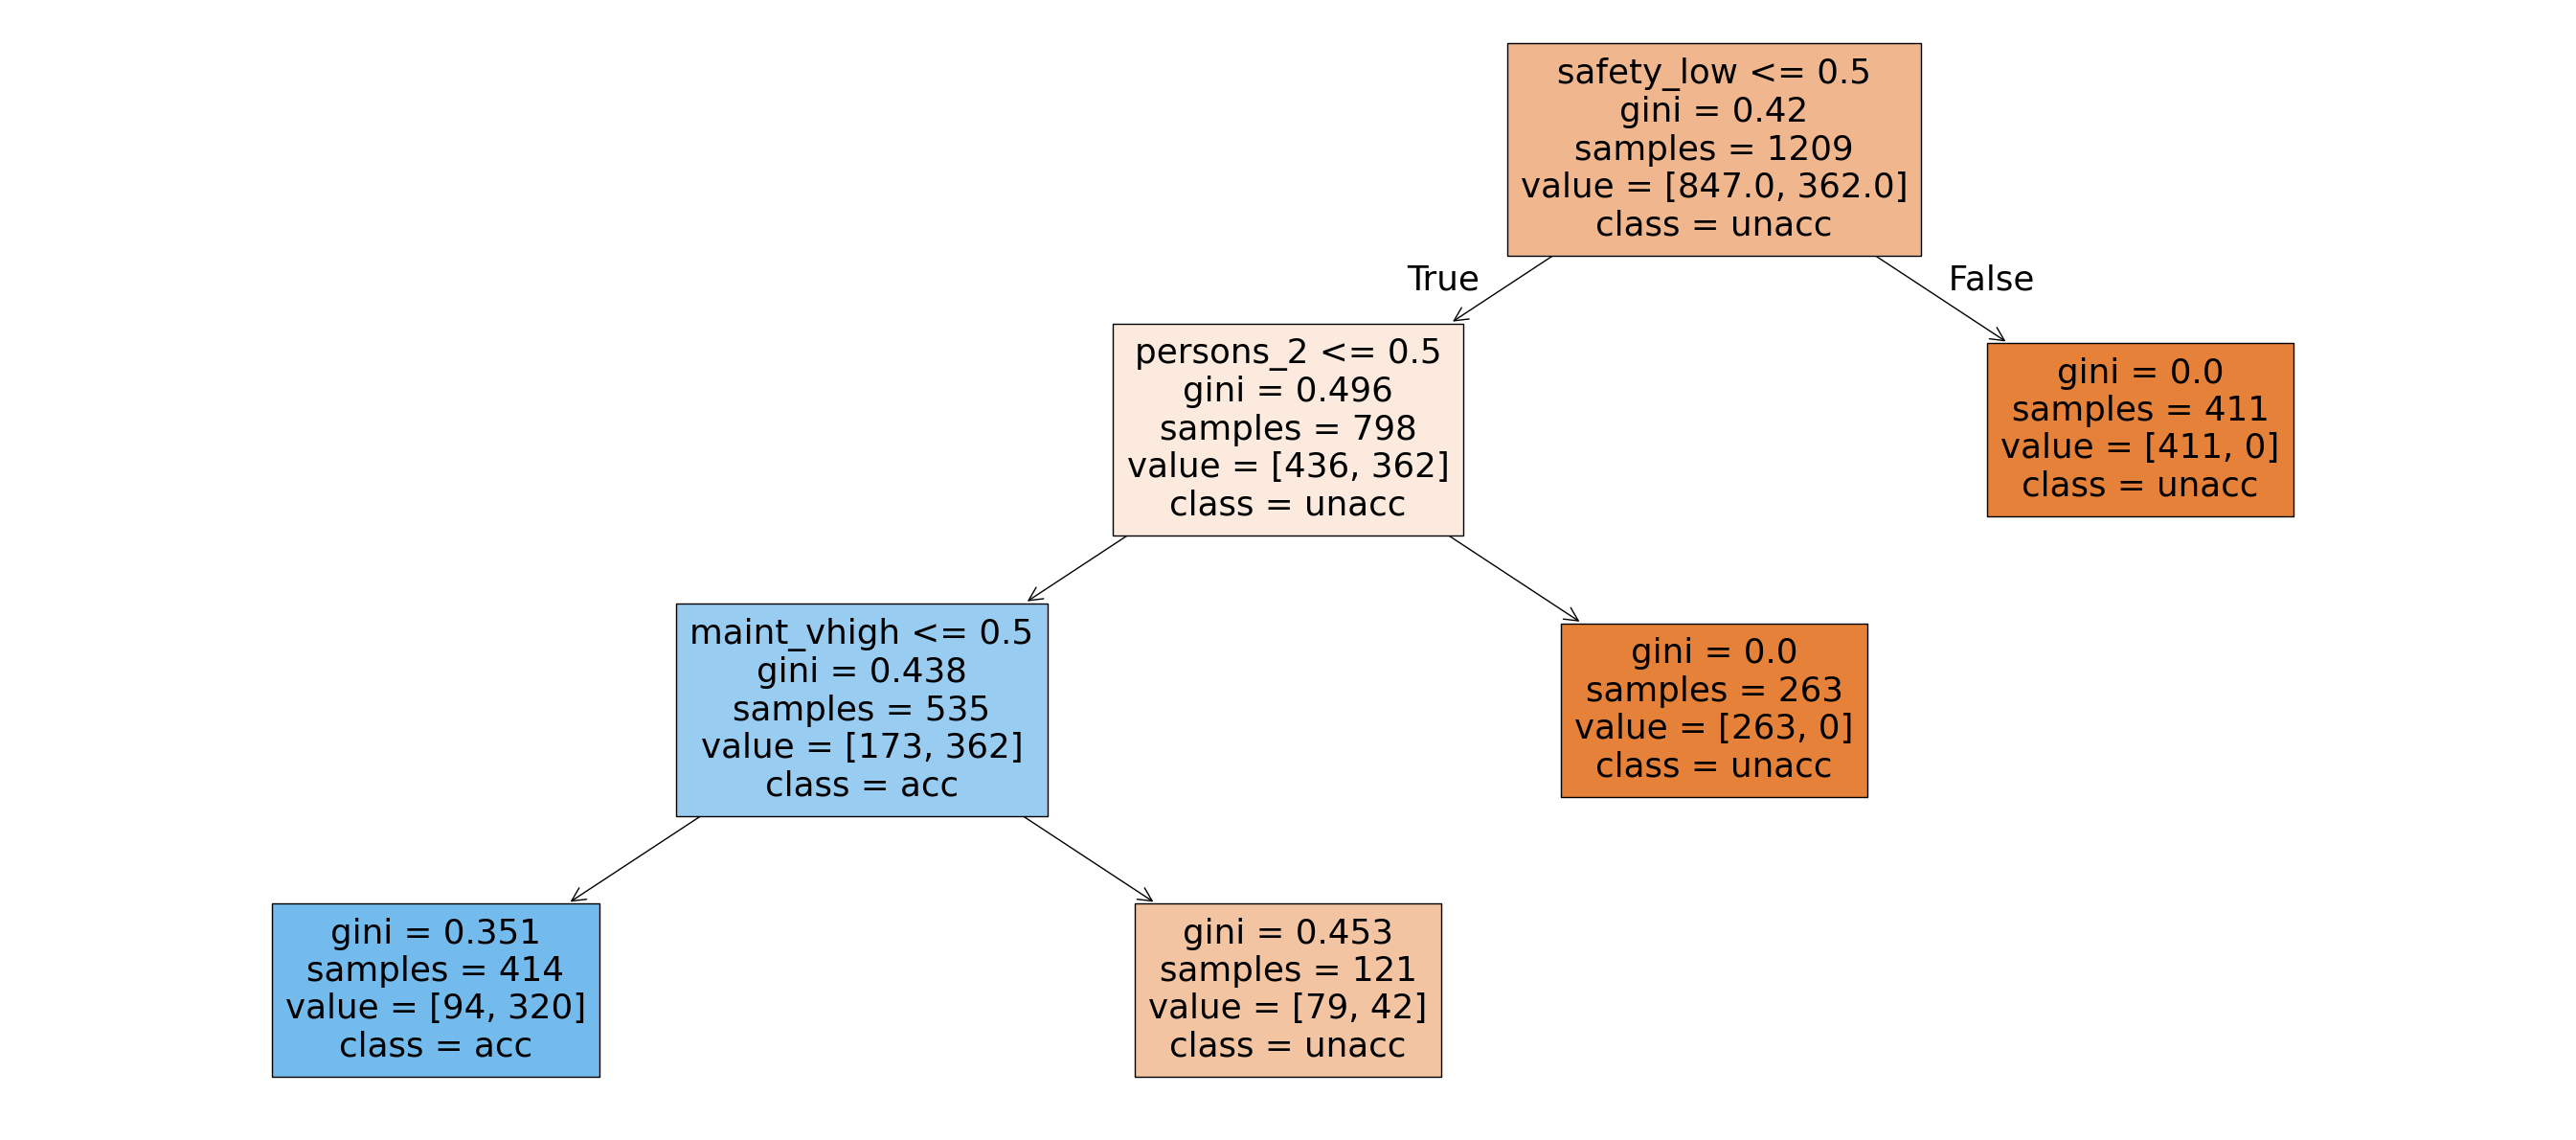

|--- safety_low <= 0.50
|   |--- persons_2 <= 0.50
|   |   |--- maint_vhigh <= 0.50
|   |   |   |--- class: True
|   |   |--- maint_vhigh >  0.50
|   |   |   |--- class: False
|   |--- persons_2 >  0.50
|   |   |--- class: False
|--- safety_low >  0.50
|   |--- class: False



In [16]:
# Load data and set target + predictors
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
    names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep']
)
df['accep'] = ~(df['accep'] == 'unacc')  # 1 = acceptable, 0 = not acceptable
X = pd.get_dummies(df.iloc[:, 0:6])
y = df['accep']

# Train-test split and fitting the tree
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)

# 1. Visualizing the tree with feature + class names
plt.figure(figsize=(27, 12))
tree.plot_tree(
    dtree,
    feature_names=x_train.columns,
    class_names=['unacc', 'acc'],
    filled=True
)
plt.tight_layout()
plt.show()

# 2. Text-based visualization with feature names
print(tree.export_text(dtree, feature_names=x_train.columns.tolist()))


# 🌳 Decision Trees: Limitations

Decision trees have two main issues: the **greedy algorithm** and **overfitting**.  
Here’s how they work together:

---

## 1. Greedy Algorithm (Not Globally Optimal)
- At each node, the algorithm calculates the **information gain** for all possible splits.
- It then picks the split that gives the **highest gain at that moment** (the “best local choice”).
- Problem: this does not guarantee the **best overall tree**.
- Sometimes, picking the *second-best split* at the root could open up better splits later, resulting in a higher overall average information gain for the tree.
- In other words: greedy splits don’t look ahead — they only optimize the current step.

---

## 2. Overfitting
- Decision trees can also **overfit** the training data.
- For example, if we split the root on all categories of a feature (like `safety = low, medium, high`), the split might perfectly fit parts of the training set.
- While this gives a very detailed “view” of the data, it makes the tree too specific and dependent on the training examples.
- As the tree grows deeper, it starts to memorize noise and outliers rather than learning general patterns.
- Result:
  - Training accuracy is very high ✅
  - Test accuracy suffers ❌ because the model fails to generalize.
- To prevent this, we usually limit depth (`max_depth`), require a minimum number of samples per split, or prune the tree after it is grown.

---


👉 In short:
- **Greedy nature** = decision trees don’t guarantee the best overall structure.
- **Overfitting risk** = large trees fit training data too well but fail to generalize.


In [19]:
# Train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# 1. Two decision trees
dtree1 = DecisionTreeClassifier()                 # no depth limit
dtree2 = DecisionTreeClassifier(max_depth=7)      # limited depth

# Fit first decision tree
dtree1.fit(x_train, y_train)
dtree1_depth = dtree1.get_depth()
print(f'First Decision Tree depth: {dtree1_depth}')

# Fit second decision tree
dtree2.fit(x_train, y_train)
dtree2_depth = dtree2.get_depth()
print(f'Second Decision Tree depth: {dtree2_depth}')

# 2. Calculate accuracy scores on test data
dtree1_score = dtree1.score(x_test, y_test)
print(f'Test set accuracy tree no max depth: {dtree1_score}')

dtree2_score = dtree2.score(x_test, y_test)
print(f'Test set accuracy tree max depth 7: {dtree2_score}')

# 3. Cross-validation to see the effect of depth
print("\nCross-validation scores:")
for d in [3, 5, 7, 9, 11, None]:
    clf = DecisionTreeClassifier(max_depth=d, random_state=0)
    scores = cross_val_score(clf, X, y, cv=5)
    print(f"max_depth={d}: CV mean={scores.mean():.4f} ± {scores.std():.4f}")


First Decision Tree depth: 11
Second Decision Tree depth: 7
Test set accuracy tree no max depth: 0.9845857418111753
Test set accuracy tree max depth 7: 0.9576107899807321

Cross-validation scores:
max_depth=3: CV mean=0.8311 ± 0.1145
max_depth=5: CV mean=0.8548 ± 0.0617
max_depth=7: CV mean=0.7987 ± 0.1138
max_depth=9: CV mean=0.8063 ± 0.1151
max_depth=11: CV mean=0.8109 ± 0.1147
max_depth=None: CV mean=0.8109 ± 0.1147


 <p style="font-size: 20px;"><b>🌳 Decision Trees: Depth vs Accuracy</b></p>

In this experiment we trained:
- A tree with **no depth limit** (depth = 11)  
- A tree with **max_depth = 7**

Results:
- Deeper tree had slightly higher accuracy (0.981 vs 0.961 on the test set).
- This shows that deeper trees don’t *always* overfit immediately; sometimes they still generalize well, especially on clean datasets like this one.

**Key takeaways:**
- Deeper trees capture more detail but risk **overfitting** when noise is present.
- Shallow trees are more **generalizable** but may underfit.
- The best depth cannot be known in advance — we should use **cross-validation** to compare performance across depths and pick the one that balances fit and generalization.
